<table style="width:100%;">
  <tr>
    <td style="text-align:left;">
      <h1>ADS 542 - Statistical Learning Project</h1>
      <h2>Carbon Emission Prediction</h2>
      <p><strong>Prepared by:</strong> Merve Kayabaşı<br>
      <strong>Date:</strong> 07.05.2025</p>
    </td>
    <td style="text-align:right;">
      <img src="tedu_logo.png" alt="TED University Logo" width="300">
    </td>
  </tr>
</table>


### Import Libraries

In [3]:
# Library for handling data and processing numbers
import pandas as pd
import numpy as np

# Libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Reducing warning content
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Overview of the dataset

In [5]:
# Load the dataset
df = pd.read_csv("CO2-Emissions.csv")

In [6]:
# Display first few rows

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.shape

(7385, 12)

### EDA and Data Cleaning

In [9]:
### Check the data types and overall structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [10]:
df.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [11]:
##Count the total number of duplicated rows
df.duplicated().sum()

1103

In [12]:
# Remove all duplicated rows and keep only the first occurrence
df.drop_duplicates(keep='first',inplace=True)


In [13]:
df.shape

(6282, 12)

The dataset now contains 6282 rows and 12 columns.

In [15]:
df = df.rename(columns={
    'Make': 'vehicle_brand',
    'Model': 'vehicle_model',
    'Vehicle Class': 'vehicle_type',
    'Fuel Type': 'Fuel_Type',
    'Engine Size(L)': 'Engine_Size_L',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City_L_per_100_km',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy_L_per_100_km',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb_L_per_100_km',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb_mpg',
    'CO2 Emissions(g/km)': 'CO2_Emissions_g_per_km'
})


In [16]:
df.columns

Index(['vehicle_brand', 'vehicle_model', 'vehicle_type', 'Engine_Size_L',
       'Cylinders', 'Transmission', 'Fuel_Type',
       'Fuel_Consumption_City_L_per_100_km',
       'Fuel_Consumption_Hwy_L_per_100_km',
       'Fuel_Consumption_Comb_L_per_100_km', 'Fuel_Consumption_Comb_mpg',
       'CO2_Emissions_g_per_km'],
      dtype='object')

In [17]:
df["vehicle_type"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [18]:
vehicle_type_clear = {
    'COMPACT': 'compact_car',
    'SUV - SMALL': 'small_suv',
    'MID-SIZE': 'medium_car',
    'TWO-SEATER': 'two_seater_sport',
    'MINICOMPACT': 'very_small_car',
    'SUBCOMPACT': 'subcompact',
    'FULL-SIZE': 'large_car',
    'STATION WAGON - SMALL': 'small_station_wagon',
    'SUV - STANDARD': 'standard_suv',
    'VAN - CARGO': 'cargo_van',
    'VAN - PASSENGER': 'passenger_van',
    'PICKUP TRUCK - STANDARD': 'large_pickup_truck',
    'MINIVAN': 'minivan',
    'SPECIAL PURPOSE VEHICLE': 'special_vehicle',
    'STATION WAGON - MID-SIZE': 'medium_station_wagon',
    'PICKUP TRUCK - SMALL': 'small_pickup_truck'
}


In [19]:
df['vehicle_type'] = df['vehicle_type'].map(vehicle_type_clear)


In [20]:
df["vehicle_brand"].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [21]:
df['vehicle_brand'] = df['vehicle_brand'].str.title()

In [22]:
df["vehicle_model"].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [23]:
# Convert all car model names to lowercase
df['vehicle_model'] = df['vehicle_model'].str.lower()

# Replace all characters that are not letters or digits with an underscore
df['vehicle_model'] = df['vehicle_model'].str.replace('[^a-z0-9]', '_', regex=True)


In [24]:
df["Engine_Size_L"].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

In [25]:
df["Cylinders"].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16], dtype=int64)

In [26]:
df["Fuel_Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [27]:
fuel_mapping = {
    'Z': 'petrol',
    'D': 'diesel',
    'X': 'LPG',
    'E': 'ethanol',
    'N': 'natural_gas'
}

df['Fuel_Type'] = df['Fuel_Type'].replace(fuel_mapping)


In [28]:
df.head()

,vehicle_brand,vehicle_model,vehicle_type,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km
0,Acura,ilx,compact_car,2.0,4,AS5,petrol,9.9,6.7,8.5,33,196
1,Acura,ilx,compact_car,2.4,4,M6,petrol,11.2,7.7,9.6,29,221
2,Acura,ilx_hybrid,compact_car,1.5,4,AV7,petrol,6.0,5.8,5.9,48,136
3,Acura,mdx_4wd,small_suv,3.5,6,AS6,petrol,12.7,9.1,11.1,25,255
4,Acura,rdx_awd,small_suv,3.5,6,AS6,petrol,12.1,8.7,10.6,27,244


In [29]:
df_rearranged = df.copy()

In [30]:
numerical_cols = ['Engine_Size_L', 'Cylinders', 'Fuel_Consumption_City_L_per_100_km', 'Fuel_Consumption_Hwy_L_per_100_km',
                  'Fuel_Consumption_Comb_L_per_100_km', 'Fuel_Consumption_Comb_mpg','CO2_Emissions_g_per_km']

In [31]:
categorical_cols = ['vehicle_brand', 'vehicle_model', 'vehicle_type','Transmission', 'Fuel_Type']

In [32]:
###Statistical summary of numerical data
df_rearranged.describe()

,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


From the results of describe(), there might be need of scaling for some of the features. For example Engine Size has a mean of 3.16, ranging from 0.9 to 8.4 whereas CO2 Emissions a mean of 251 and it ranges from 96 to 522. Data scaling is beneficial for models like **Ridge, Lasso, K-nearest Neighbours and Neural Networks**.

In [34]:
df_rearranged.describe(include="object")


,vehicle_brand,vehicle_model,vehicle_type,Transmission,Fuel_Type
count,6282,6282,6282,6282,6282
unique,42,1596,16,27,5
top,Ford,mustang,small_suv,AS6,LPG
freq,577,33,1006,1139,3039


In [35]:
print(df.isnull().sum())

vehicle_brand                         0
vehicle_model                         0
vehicle_type                          0
Engine_Size_L                         0
Cylinders                             0
Transmission                          0
Fuel_Type                             0
Fuel_Consumption_City_L_per_100_km    0
Fuel_Consumption_Hwy_L_per_100_km     0
Fuel_Consumption_Comb_L_per_100_km    0
Fuel_Consumption_Comb_mpg             0
CO2_Emissions_g_per_km                0
dtype: int64


There is no missing values in the data set.

## Visualizations of Numerical Features

__Boxplot__

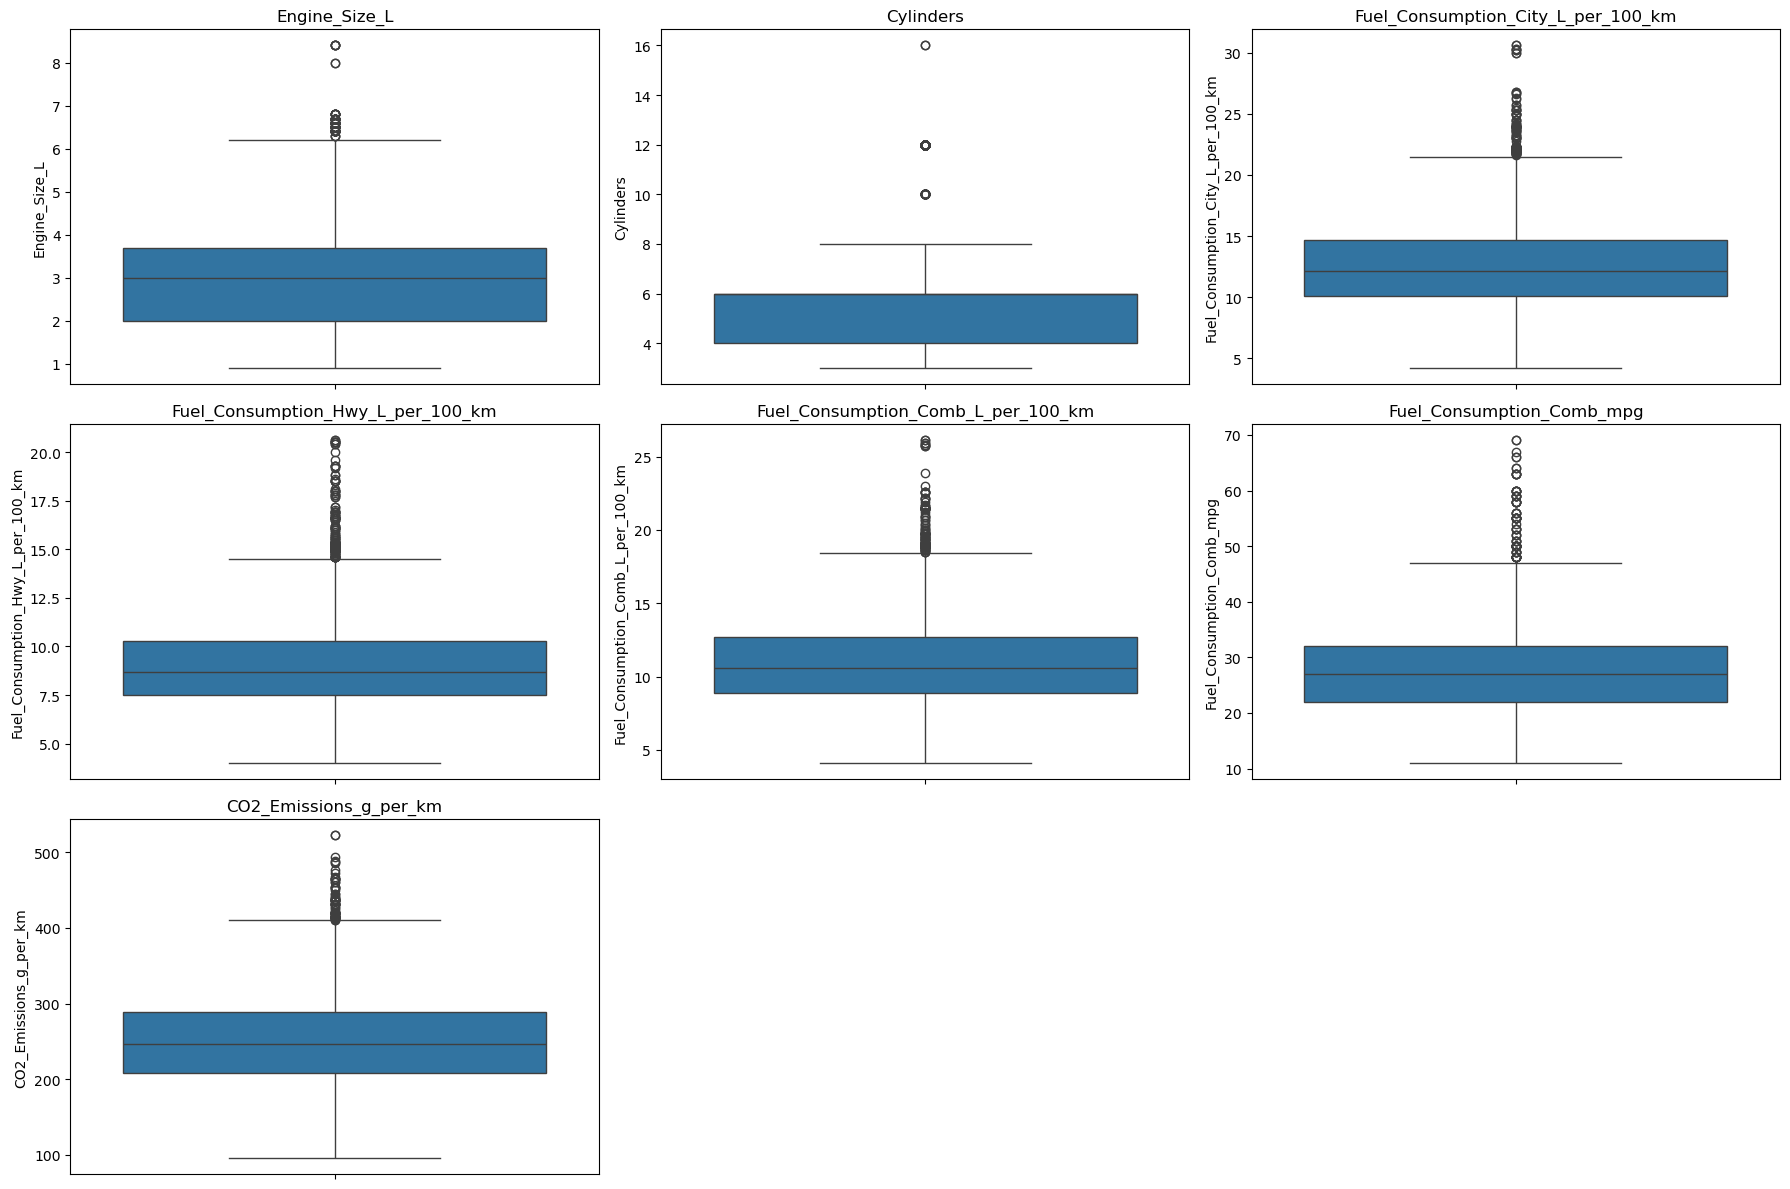

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Engine_Size_L', 'Cylinders', 
                  'Fuel_Consumption_City_L_per_100_km', 
                  'Fuel_Consumption_Hwy_L_per_100_km',
                  'Fuel_Consumption_Comb_L_per_100_km', 
                  'Fuel_Consumption_Comb_mpg',
                  'CO2_Emissions_g_per_km']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_rearranged[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


__Pairplots__

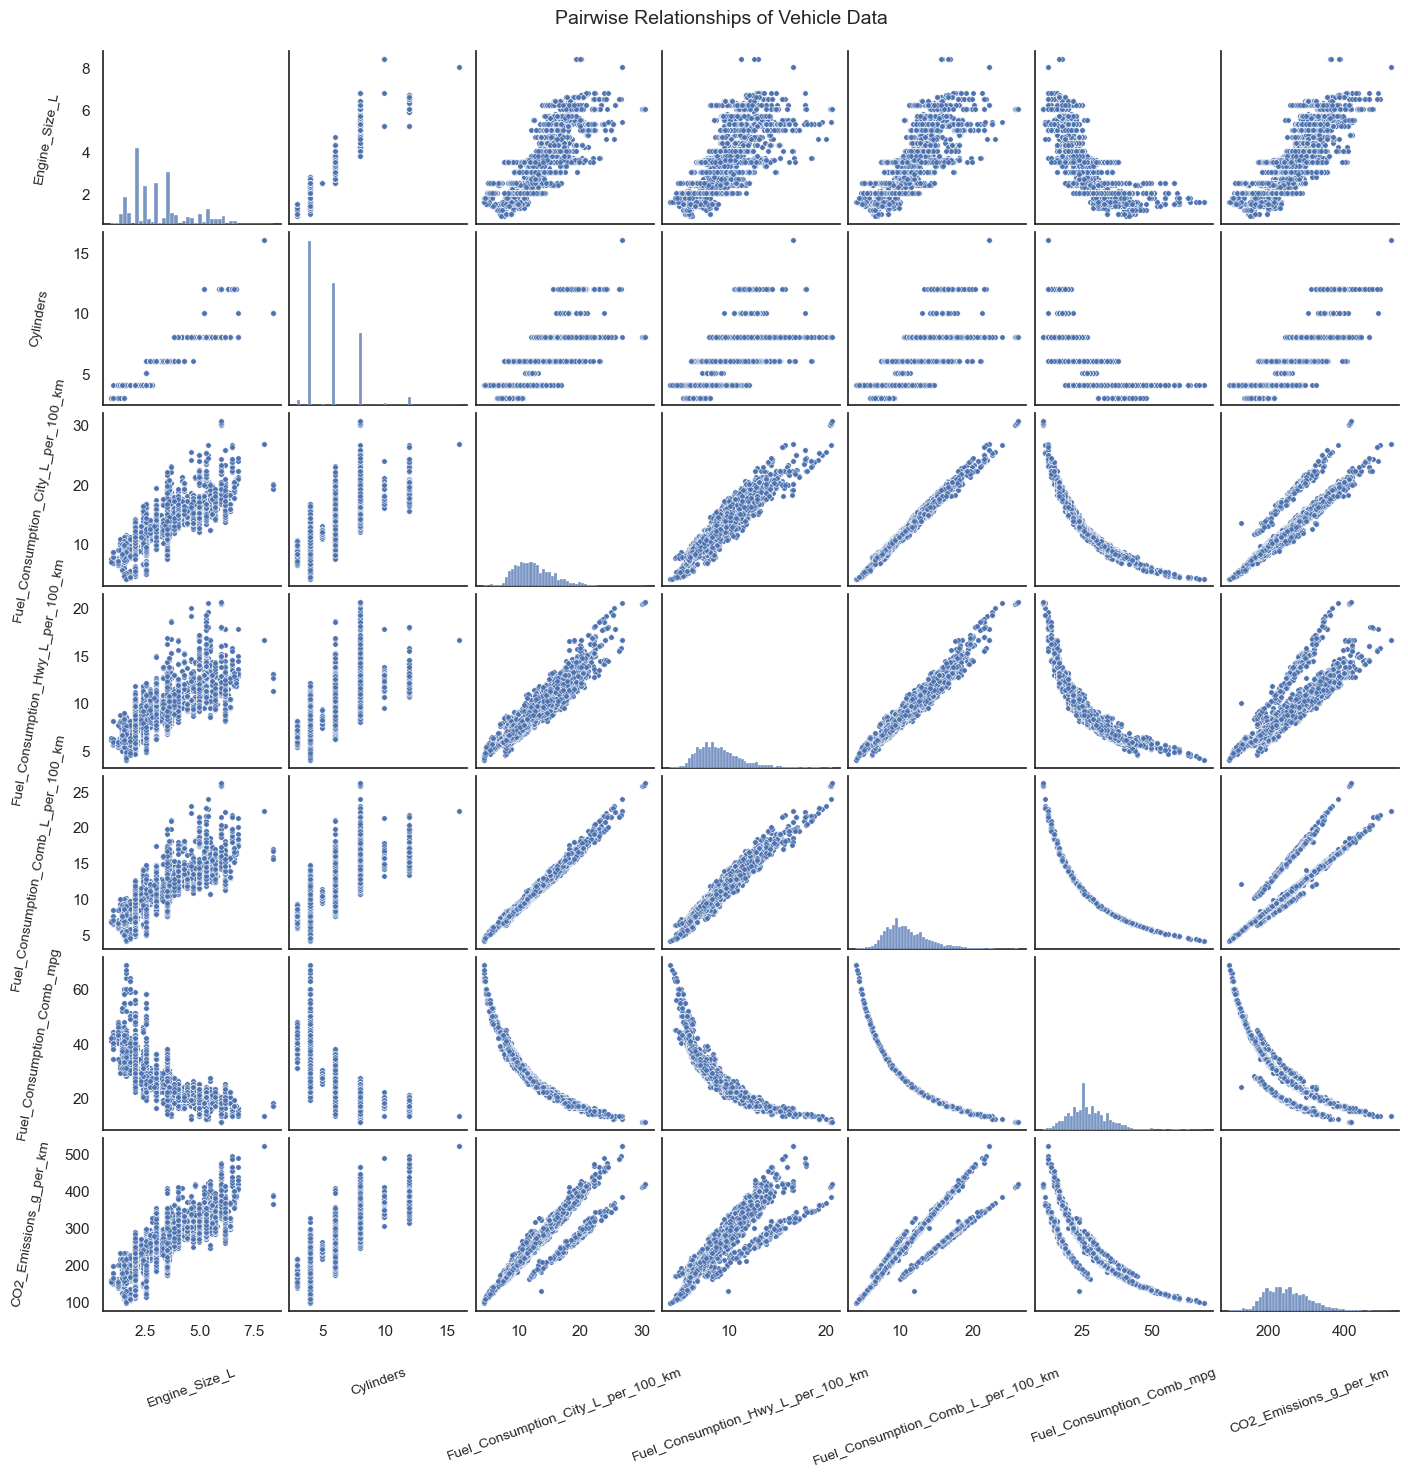

In [41]:
### Visualize pairwise relationships between numerical features using scatter plots and histograms

sns.set(style="white")

g = sns.pairplot(df_rearranged, height=2, plot_kws={'s': 15})

# Rotate y-axis labels to avoid overlapping
for ax in g.axes[:, 0]: 
    ax.set_ylabel(ax.get_ylabel(), rotation=80, fontsize=10, labelpad=20)

# apply a similar rotation for the x-axis labels as well
for ax in g.axes[-1, :]:
    ax.set_xlabel(ax.get_xlabel(), rotation=20, fontsize=10, labelpad=20)

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Pairwise Relationships of Vehicle Data", fontsize=14)
plt.show()

Pairplot shows that Engine_Size_L, Cylinders, and fuel consumption features are positively correlated with CO2_Emissions_g_per_km. Especially, Fuel_Consumption_Comb_L_per_100_km has a strong linear relationship with emissions. In contrast, Fuel_Consumption_Comb_mpg has a clear negative correlation. 

## Visualizations of Categorical Features

__BarPlot__

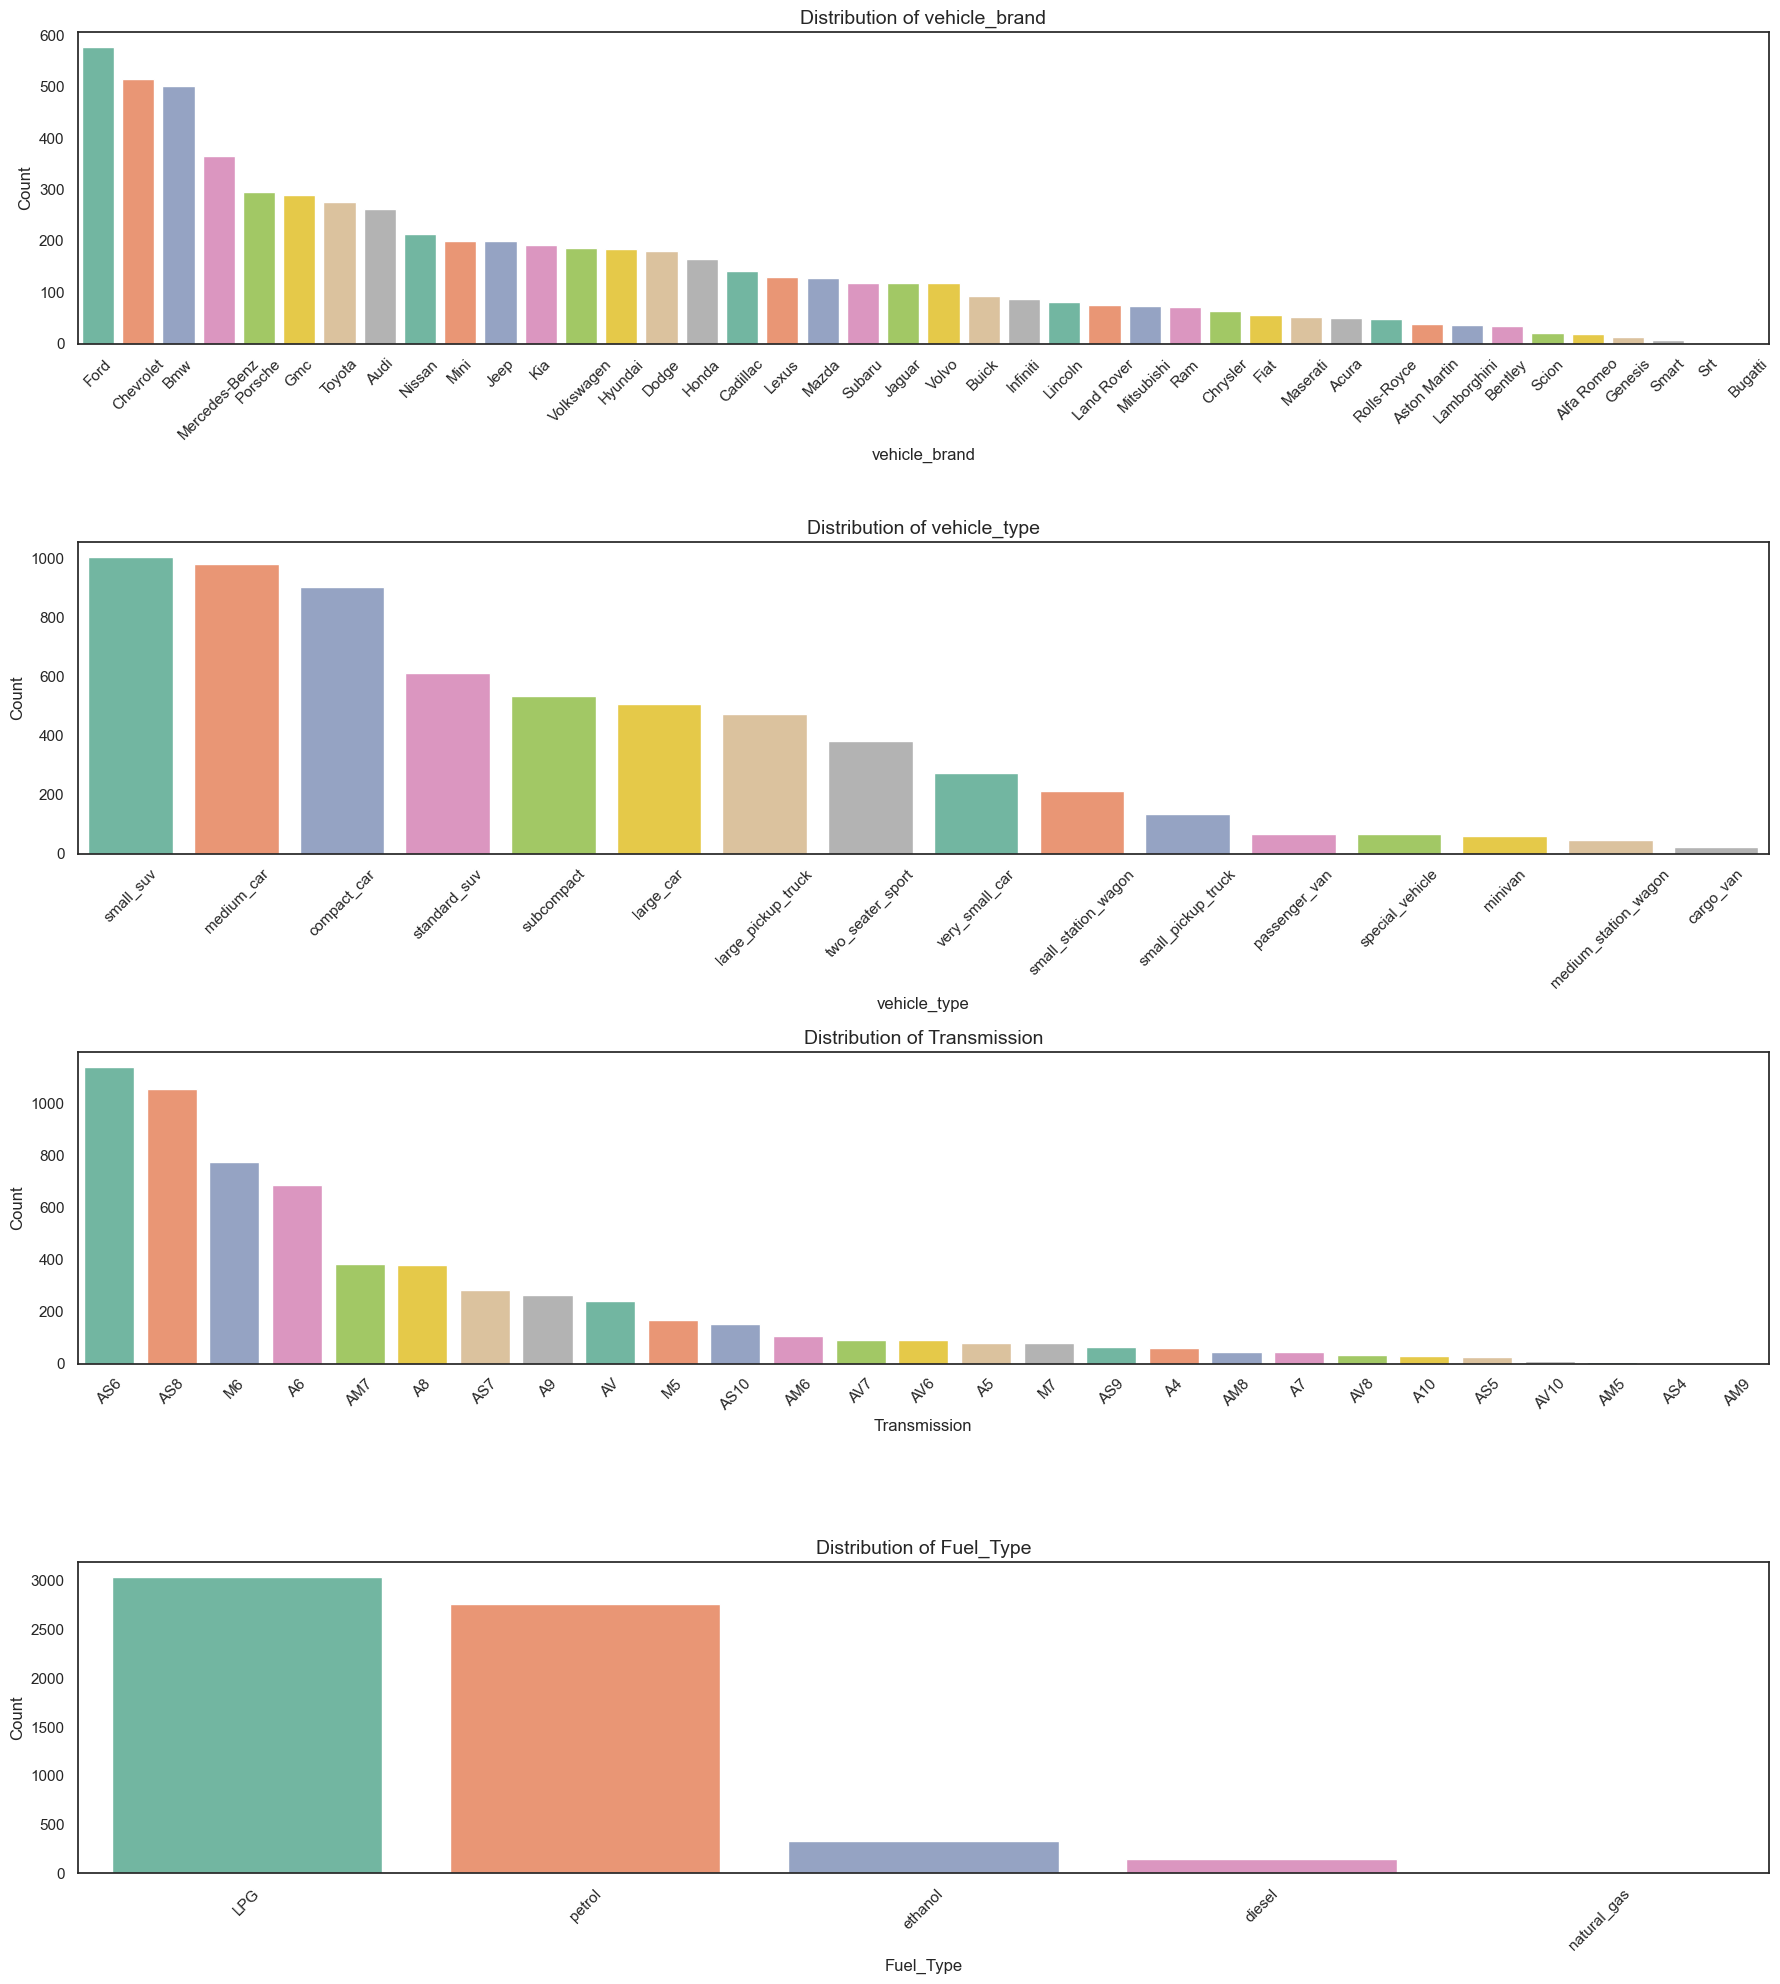

In [45]:
# List of categorical columns to visualize

categorical_cols = ['vehicle_brand', 'vehicle_type','Transmission', 'Fuel_Type']

# Set figure size dynamically based on number of features
plt.figure(figsize=(18, 5 * len(categorical_cols)))

# Loop through each categorical feature and create a bar plot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i) ## Create a subplot for each feature
    order = df[col].value_counts().index     ##Sort categories by frequency
    sns.countplot(data=df_rearranged, x=col, order=order, palette='Set2')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [46]:
# First, select only the numeric columns of the DataFrame
numerical_cols = ['Engine_Size_L', 'Cylinders',
                  'Fuel_Consumption_City_L_per_100_km',
                  'Fuel_Consumption_Hwy_L_per_100_km',
                  'Fuel_Consumption_Comb_L_per_100_km',
                  'Fuel_Consumption_Comb_mpg',
                  'CO2_Emissions_g_per_km']

# Now, you can safely calculate the correlation matrix
corr_matrix = df_rearranged[numerical_cols].corr()

corr_matrix

,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km
Engine_Size_L,1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel_Consumption_City_L_per_100_km,0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel_Consumption_Hwy_L_per_100_km,0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel_Consumption_Comb_L_per_100_km,0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel_Consumption_Comb_mpg,-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2_Emissions_g_per_km,0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


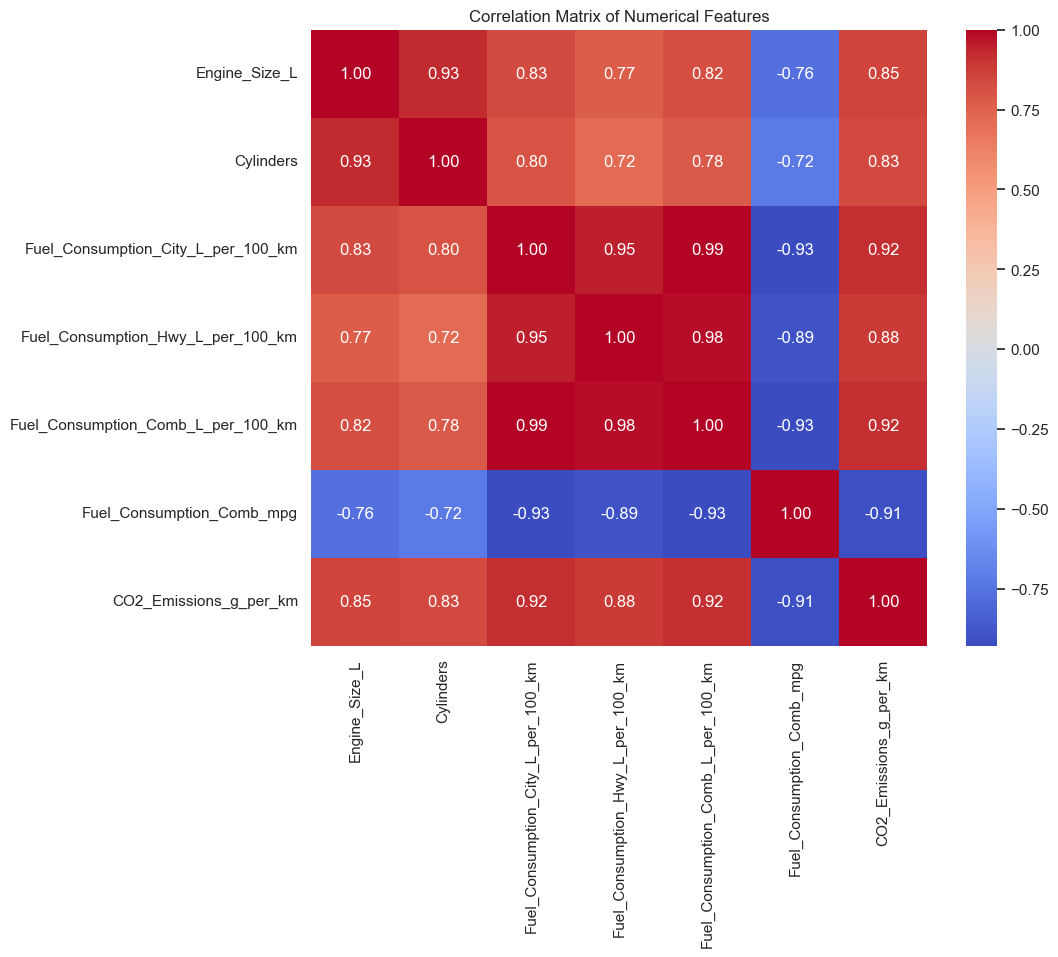

In [47]:
# # Heatmap for the numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Several fuel consumption variables (e.g., `Fuel_Consumption_City_L_per_100_km`, `Fuel_Consumption_Hwy_L_per_100_km`, and `Fuel_Consumption_Comb_L_per_100_km`) exhibit very high correlation with each other. This suggests multicollinearity, which can negatively impact model performance. To avoid redundancy and simplify the model, it is advisable to retain only one of these features — typically the combined fuel consumption — during the feature selection process.


In [49]:
# Select categorical columns with fewer unique categories for encoding
categorical_cols_to_encode = ['vehicle_type', 'Fuel_Type']

# Apply One-Hot Encoding only to selected categorical features
#df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
df_encoded = pd.get_dummies(df_rearranged, columns=categorical_cols_to_encode, drop_first=True, dtype=int)


# Explanation:
# We only include 'vehicle_type', 'Fuel_Type', and 'Transmission' for encoding
# because:
# - They have relatively fewer unique categories.
# - They represent general vehicle characteristics.
# - Encoding high-cardinality features like 'vehicle_model' would generate too many columns,
#   making the heatmap cluttered and hard to interpret.


In [50]:
# Check datatypes
print(df_encoded.dtypes)

vehicle_brand                          object
vehicle_model                          object
Engine_Size_L                         float64
Cylinders                               int64
Transmission                           object
Fuel_Consumption_City_L_per_100_km    float64
Fuel_Consumption_Hwy_L_per_100_km     float64
Fuel_Consumption_Comb_L_per_100_km    float64
Fuel_Consumption_Comb_mpg               int64
CO2_Emissions_g_per_km                  int64
vehicle_type_compact_car                int32
vehicle_type_large_car                  int32
vehicle_type_large_pickup_truck         int32
vehicle_type_medium_car                 int32
vehicle_type_medium_station_wagon       int32
vehicle_type_minivan                    int32
vehicle_type_passenger_van              int32
vehicle_type_small_pickup_truck         int32
vehicle_type_small_station_wagon        int32
vehicle_type_small_suv                  int32
vehicle_type_special_vehicle            int32
vehicle_type_standard_suv         

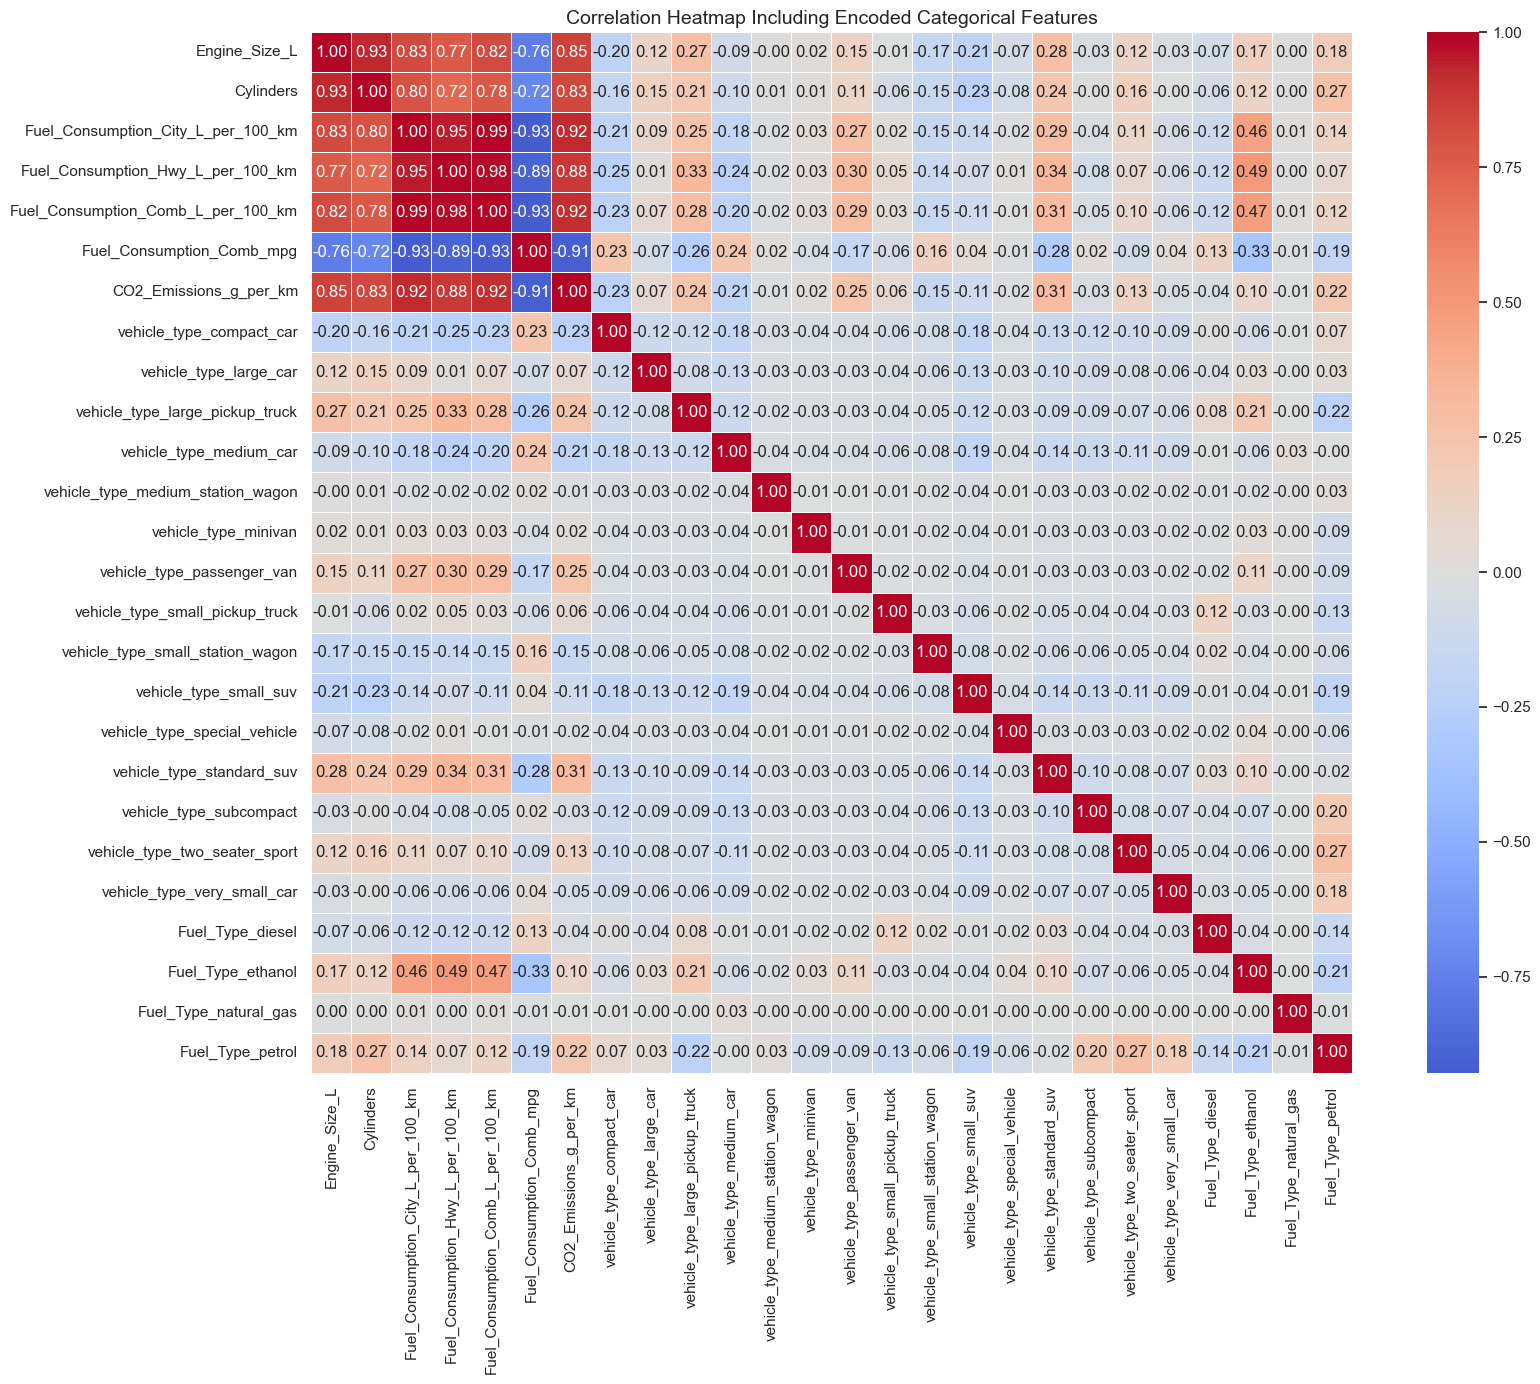

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the figure size for the heatmap
plt.figure(figsize=(18, 14))

# Compute the correlation matrix using only numerical columns
corr = df_encoded.select_dtypes(include='number').corr()


# Create a heatmap to visualize the correlation matrix
sns.heatmap(
    corr, 
    annot=True,            
    fmt=".2f",              
    cmap='coolwarm',        
    center=0,              
    linewidths=0.5,         
    square=True            
)

plt.title("Correlation Heatmap Including Encoded Categorical Features", fontsize=14)
plt.tight_layout()
plt.show()



__Heatmap Interpretation (with Encoded Features)__

The heatmap shows correlations between numerical features and encoded categorical variables (`vehicle_type` and `fuel_type`).

- Fuel consumption metrics and CO2 emissions are strongly positively correlated, as expected.
- Engine size and number of cylinders are also highly correlated with emissions.
- Fuel efficiency (`Fuel_Consumption_Comb_mpg`) shows negative correlation with fuel consumption and emissions.
- Larger vehicle types (e.g., standard SUV, large pickup truck) tend to have higher CO2 emissions.
- Smaller cars and compact types show negative correlation with emissions, indicating better efficiency.
- Ethanol is positively correlated with higher fuel consumption and CO2 emissions, diesel shows a weak negative correlation with CO2 emissions, indicating better efficiency.Natural gas appears to have minimal correlation with other variables, likely due to its limited representation in the dataset.

This correlation matrix helps us understand key feature relationships for further analysis and model development.


## Data Preprocessing 

In [54]:
df_encoding=df_rearranged.copy()

In [55]:
df_encoding

,vehicle_brand,vehicle_model,vehicle_type,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km
0,Acura,ilx,compact_car,2.0,4,AS5,petrol,9.9,6.7,8.5,33,196
1,Acura,ilx,compact_car,2.4,4,M6,petrol,11.2,7.7,9.6,29,221
2,Acura,ilx_hybrid,compact_car,1.5,4,AV7,petrol,6.0,5.8,5.9,48,136
3,Acura,mdx_4wd,small_suv,3.5,6,AS6,petrol,12.7,9.1,11.1,25,255
4,Acura,rdx_awd,small_suv,3.5,6,AS6,petrol,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,Volvo,xc40_t5_awd,small_suv,2.0,4,AS8,petrol,10.7,7.7,9.4,30,219
7381,Volvo,xc60_t5_awd,small_suv,2.0,4,AS8,petrol,11.2,8.3,9.9,29,232
7382,Volvo,xc60_t6_awd,small_suv,2.0,4,AS8,petrol,11.7,8.6,10.3,27,240
7383,Volvo,xc90_t5_awd,standard_suv,2.0,4,AS8,petrol,11.2,8.3,9.9,29,232


__Encoding__

In [57]:
# Group high-cardinality columns (top 10 + 'Other')
top_brands = df_encoding['vehicle_brand'].value_counts().nlargest(10).index

# Create a new column: label values other than the frequent ones as 'Other'
df_encoding['brand_grouped'] = df_encoding['vehicle_brand'].apply(lambda x: x if x in top_brands else 'Other')


In [58]:
# Group high-cardinality columns (top 10 + 'Other')
top_models = df_encoding['vehicle_model'].value_counts().nlargest(10).index
df_encoding['model_grouped'] = df_encoding['vehicle_model'].apply(lambda x: x if x in top_models else 'Other')


In [59]:
#  One-hot encode grouped columns and concatenate
grouped_encoded = pd.get_dummies(df_encoding[['brand_grouped', 'model_grouped']], drop_first=True).astype(int)
df_encoding= pd.concat([df_encoding, grouped_encoded], axis=1)

In [60]:
# Drop original high-cardinality columns
df_encoding.drop(['vehicle_brand', 'vehicle_model'], axis=1, inplace=True)

In [61]:
df_encoding.drop(['brand_grouped', 'model_grouped'], axis=1, inplace=True)


In [62]:
df_encoding

,vehicle_type,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km,...,model_grouped_camaro,model_grouped_corolla,model_grouped_f_150_ffv,model_grouped_f_150_ffv_4x4,model_grouped_focus_ffv,model_grouped_mustang,model_grouped_sierra,model_grouped_sierra_4wd,model_grouped_silverado,model_grouped_silverado_4wd
0,compact_car,2.0,4,AS5,petrol,9.9,6.7,8.5,33,196,...,0,0,0,0,0,0,0,0,0,0
1,compact_car,2.4,4,M6,petrol,11.2,7.7,9.6,29,221,...,0,0,0,0,0,0,0,0,0,0
2,compact_car,1.5,4,AV7,petrol,6.0,5.8,5.9,48,136,...,0,0,0,0,0,0,0,0,0,0
3,small_suv,3.5,6,AS6,petrol,12.7,9.1,11.1,25,255,...,0,0,0,0,0,0,0,0,0,0
4,small_suv,3.5,6,AS6,petrol,12.1,8.7,10.6,27,244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,small_suv,2.0,4,AS8,petrol,10.7,7.7,9.4,30,219,...,0,0,0,0,0,0,0,0,0,0
7381,small_suv,2.0,4,AS8,petrol,11.2,8.3,9.9,29,232,...,0,0,0,0,0,0,0,0,0,0
7382,small_suv,2.0,4,AS8,petrol,11.7,8.6,10.3,27,240,...,0,0,0,0,0,0,0,0,0,0
7383,standard_suv,2.0,4,AS8,petrol,11.2,8.3,9.9,29,232,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   vehicle_type                        6282 non-null   object 
 1   Engine_Size_L                       6282 non-null   float64
 2   Cylinders                           6282 non-null   int64  
 3   Transmission                        6282 non-null   object 
 4   Fuel_Type                           6282 non-null   object 
 5   Fuel_Consumption_City_L_per_100_km  6282 non-null   float64
 6   Fuel_Consumption_Hwy_L_per_100_km   6282 non-null   float64
 7   Fuel_Consumption_Comb_L_per_100_km  6282 non-null   float64
 8   Fuel_Consumption_Comb_mpg           6282 non-null   int64  
 9   CO2_Emissions_g_per_km              6282 non-null   int64  
 10  brand_grouped_Bmw                   6282 non-null   int32  
 11  brand_grouped_Chevrolet             6282 non-nul

In [64]:
#Define the categorical columns to be encoded using One-Hot Encoding
cols_to_encode = ['vehicle_type', 'Transmission', 'Fuel_Type']

# Apply One-Hot Encoding to the selected columns
# drop_first=True is used to avoid multicollinearity by dropping the first category of each column
basic_encoded = pd.get_dummies(df_encoding[cols_to_encode], drop_first=True).astype(int)


In [65]:
basic_encoded

,vehicle_type_compact_car,vehicle_type_large_car,vehicle_type_large_pickup_truck,vehicle_type_medium_car,vehicle_type_medium_station_wagon,vehicle_type_minivan,vehicle_type_passenger_van,vehicle_type_small_pickup_truck,vehicle_type_small_station_wagon,vehicle_type_small_suv,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel_Type_diesel,Fuel_Type_ethanol,Fuel_Type_natural_gas,Fuel_Type_petrol
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7381,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7382,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
basic_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   vehicle_type_compact_car           6282 non-null   int32
 1   vehicle_type_large_car             6282 non-null   int32
 2   vehicle_type_large_pickup_truck    6282 non-null   int32
 3   vehicle_type_medium_car            6282 non-null   int32
 4   vehicle_type_medium_station_wagon  6282 non-null   int32
 5   vehicle_type_minivan               6282 non-null   int32
 6   vehicle_type_passenger_van         6282 non-null   int32
 7   vehicle_type_small_pickup_truck    6282 non-null   int32
 8   vehicle_type_small_station_wagon   6282 non-null   int32
 9   vehicle_type_small_suv             6282 non-null   int32
 10  vehicle_type_special_vehicle       6282 non-null   int32
 11  vehicle_type_standard_suv          6282 non-null   int32
 12  vehicle_type_subcompact  

In [67]:
df_total= pd.concat([df_encoding, basic_encoded ], axis=1)

In [68]:

df_total.drop(['vehicle_type', 'Transmission','Fuel_Type'], axis=1, inplace=True)

In [69]:
df_total

,Engine_Size_L,Cylinders,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km,brand_grouped_Bmw,brand_grouped_Chevrolet,brand_grouped_Ford,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel_Type_diesel,Fuel_Type_ethanol,Fuel_Type_natural_gas,Fuel_Type_petrol
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,240,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 72 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Engine_Size_L                       6282 non-null   float64
 1   Cylinders                           6282 non-null   int64  
 2   Fuel_Consumption_City_L_per_100_km  6282 non-null   float64
 3   Fuel_Consumption_Hwy_L_per_100_km   6282 non-null   float64
 4   Fuel_Consumption_Comb_L_per_100_km  6282 non-null   float64
 5   Fuel_Consumption_Comb_mpg           6282 non-null   int64  
 6   CO2_Emissions_g_per_km              6282 non-null   int64  
 7   brand_grouped_Bmw                   6282 non-null   int32  
 8   brand_grouped_Chevrolet             6282 non-null   int32  
 9   brand_grouped_Ford                  6282 non-null   int32  
 10  brand_grouped_Gmc                   6282 non-null   int32  
 11  brand_grouped_Mercedes-Benz         6282 non-nul

__Feature Selection__

In [72]:
# These three features (City, Hwy, and Comb fuel consumption) are highly correlated.
# To avoid multicollinearity, we drop two of them and keep only one representative (Combined).
drop_cols = [
    'Fuel_Consumption_City_L_per_100_km',
    'Fuel_Consumption_Hwy_L_per_100_km'
]

df_total.drop(columns=drop_cols, inplace=True)


In [73]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Engine_Size_L                       6282 non-null   float64
 1   Cylinders                           6282 non-null   int64  
 2   Fuel_Consumption_Comb_L_per_100_km  6282 non-null   float64
 3   Fuel_Consumption_Comb_mpg           6282 non-null   int64  
 4   CO2_Emissions_g_per_km              6282 non-null   int64  
 5   brand_grouped_Bmw                   6282 non-null   int32  
 6   brand_grouped_Chevrolet             6282 non-null   int32  
 7   brand_grouped_Ford                  6282 non-null   int32  
 8   brand_grouped_Gmc                   6282 non-null   int32  
 9   brand_grouped_Mercedes-Benz         6282 non-null   int32  
 10  brand_grouped_Mini                  6282 non-null   int32  
 11  brand_grouped_Nissan                6282 non-nul

__Standard Scaler__

In [75]:
# Select numerical features (exclude one-hot encoded binaries if needed)
# Select numerical features, EXCLUDING the target
num_features_to_scale = df_total.select_dtypes(include=['float64', 'int64']).columns
num_features_to_scale = num_features_to_scale.drop('CO2_Emissions_g_per_km')


# Check
print(num_features_to_scale)


Index(['Engine_Size_L', 'Cylinders', 'Fuel_Consumption_Comb_L_per_100_km',
       'Fuel_Consumption_Comb_mpg'],
      dtype='object')


In [76]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object
scaler = StandardScaler()

# Scale the selected numerical features
scaled_values = scaler.fit_transform(df_total[num_features_to_scale])

# Convert the scaled values back to a DataFrame with renamed columns
scaled_df = pd.DataFrame(scaled_values, columns=[f'{col}_scaled' for col in num_features_to_scale])

# Concatenate the scaled features with the original DataFrame
df_total_scaled = pd.concat([df_total.reset_index(drop=True), scaled_df], axis=1)



In [77]:
df_total_scaled.drop(columns=num_features_to_scale, inplace=True)


In [78]:
df_total_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6282 entries, 0 to 6281
Data columns (total 70 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CO2_Emissions_g_per_km                     6282 non-null   int64  
 1   brand_grouped_Bmw                          6282 non-null   int32  
 2   brand_grouped_Chevrolet                    6282 non-null   int32  
 3   brand_grouped_Ford                         6282 non-null   int32  
 4   brand_grouped_Gmc                          6282 non-null   int32  
 5   brand_grouped_Mercedes-Benz                6282 non-null   int32  
 6   brand_grouped_Mini                         6282 non-null   int32  
 7   brand_grouped_Nissan                       6282 non-null   int32  
 8   brand_grouped_Other                        6282 non-null   int32  
 9   brand_grouped_Porsche                      6282 non-null   int32  
 10  brand_grouped_Toyota    

In [79]:
df_total_scaled.describe()

,CO2_Emissions_g_per_km,brand_grouped_Bmw,brand_grouped_Chevrolet,brand_grouped_Ford,brand_grouped_Gmc,brand_grouped_Mercedes-Benz,brand_grouped_Mini,brand_grouped_Nissan,brand_grouped_Other,brand_grouped_Porsche,...,Transmission_M6,Transmission_M7,Fuel_Type_diesel,Fuel_Type_ethanol,Fuel_Type_natural_gas,Fuel_Type_petrol,Engine_Size_L_scaled,Cylinders_scaled,Fuel_Consumption_Comb_L_per_100_km_scaled,Fuel_Consumption_Comb_mpg_scaled
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,...,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6.282000e+03,6.282000e+03,6.282000e+03,6.282000e+03
mean,251.157752,0.079752,0.081980,0.091850,0.046004,0.058103,0.031837,0.033906,0.443649,0.047119,...,0.123050,0.012416,0.023400,0.052531,0.000159,0.440146,4.026635e-16,1.832345e-16,8.143756e-17,-2.081182e-16
std,59.290426,0.270930,0.274356,0.288837,0.209511,0.233956,0.175580,0.181003,0.496854,0.211910,...,0.328521,0.110744,0.151183,0.223113,0.012617,0.496444,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.656892e+00,-1.418616e+00,-2.347716e+00,-2.265232e+00
25%,208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.510862e-01,-8.769341e-01,-7.187426e-01,-7.468888e-01
50%,246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.185352e-01,2.064287e-01,-1.418145e-01,-5.673296e-02
75%,289.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.942505e-01,2.064287e-01,5.708614e-01,6.334228e-01
max,522.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.837240e+00,5.623243e+00,5.118412e+00,5.740576e+00


We standardized the numerical features using StandardScaler to ensure that all variables contribute equally to the analysis. 
This step is essential for many machine learning algorithms that are sensitive to the scale of data, such as KNN or SVM.


## Model Selection

In [82]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_total_scaled.drop('CO2_Emissions_g_per_km', axis=1)
y = df_total_scaled['CO2_Emissions_g_per_km']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5025, 69)
X_test shape: (1257, 69)
y_train shape: (5025,)
y_test shape: (1257,)


## Multiple Linear Regression 

In [84]:
#Regression model fitting
from sklearn.linear_model import LinearRegression
# Metric Imports
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)           #Initialize a linear regression model and fit it to the training data.
                                         #This is a multiple linear regression since we are using multiple features (X).
# Predict on the test set
y_pred = lr_model.predict(X_test)        #After training, we make predictions on the test set and evaluate the model.

# Evaluate model performance             
mse = mean_squared_error(y_test, y_pred) #We use Mean Squared Error, Mean Absolute Error, and R-squared to assess performance.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Linear Regression Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R² Score): {r2:.4f}")


Linear Regression Performance Metrics:
Mean Squared Error (MSE): 31.2943
Mean Absolute Error (MAE): 3.2338
R-squared (R² Score): 0.9913


The multiple linear regression model performed exceptionally well. 
With a very low Mean Squared Error (0.0089) and Mean Absolute Error (0.0545), 
the model's predictions are highly accurate. Moreover, the R² score of 0.9913 
indicates that the model explains approximately 99% of the variance in CO2 emissions, 
which is an excellent result.



In [86]:
# Predictions on training data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Train performance metrics
print("\nTrain Performance:")
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))


# Evaluate model performance on test set
print("\nTest Performance:")
print("R² Score:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))


Train Performance:
Train R² Score: 0.9934302138949028
Train MSE: 22.933031693633673
Train MAE: 2.99413032970308

Test Performance:
R² Score: 0.9913281471756695
MSE: 31.294303777209485
MAE: 3.233758711094346


The model performs consistently well on both training and test sets. 
The small gap between R² scores and error metrics indicates that the model is not overfitting 
and generalizes well to unseen data.


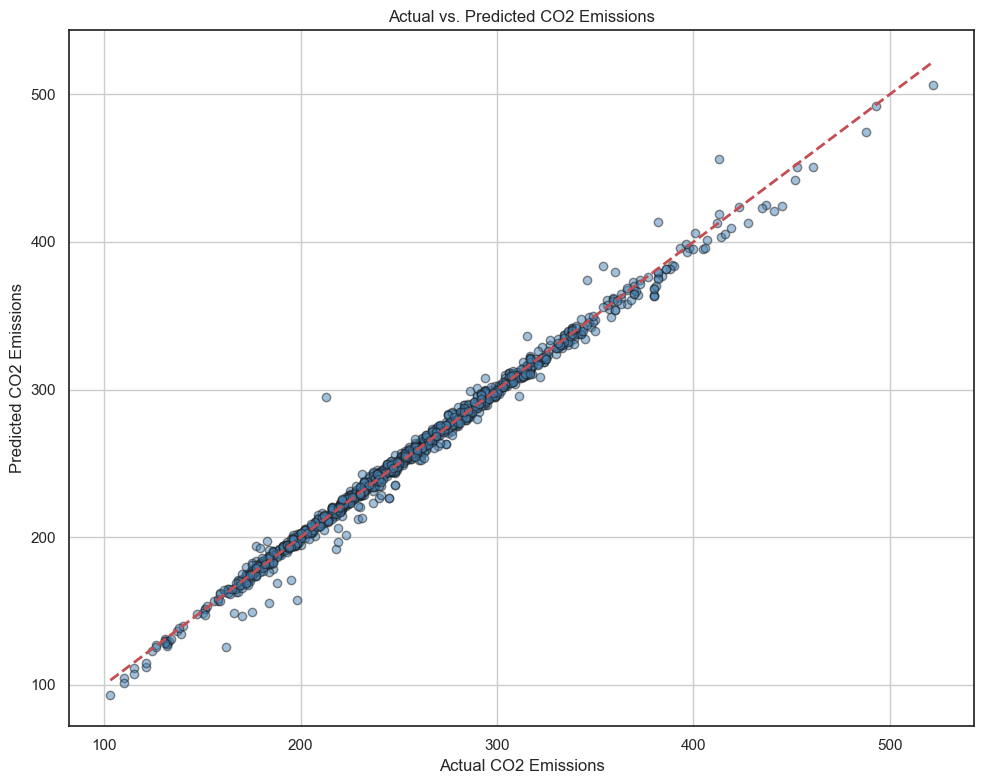

In [88]:
# y_test are the actual CO2 values, y_pred are the model predicted values

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='steelblue', edgecolors='k')  # Predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Linear reference line

plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs. Predicted CO2 Emissions")
plt.grid(True)
plt.tight_layout()
plt.show()


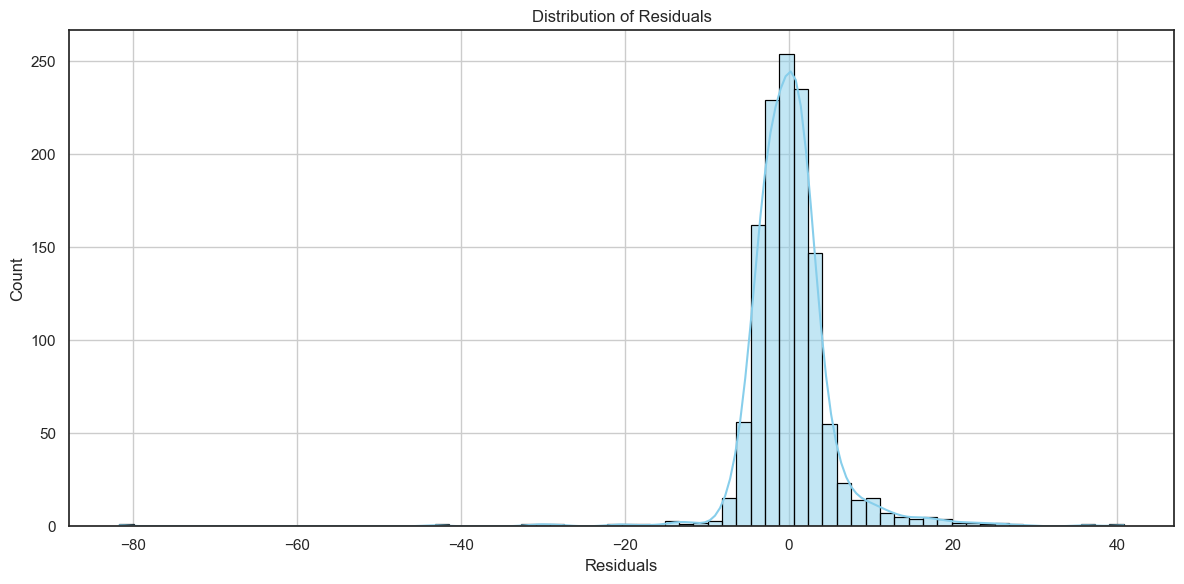

In [89]:
# Calculate residuals (differences between actual and predicted values)
residuals = y_test - y_pred

# Plot histogram with Kernel Density Estimation (KDE)
plt.figure(figsize=(12, 6))  # Set the figure size
sns.histplot(residuals, kde=True, bins=70, color='skyblue', edgecolor='black')  # Histogram with KDE curve
plt.title("Distribution of Residuals")  # Set plot title
plt.xlabel("Residuals")  # Label for the x-axis
plt.ylabel("Count")      # Label for the y-axis
plt.grid(True)           # Add gridlines to the plot
plt.tight_layout()       # Adjust layout for better spacing
plt.show()               # Display the plot


## Random Forest

In [91]:
# Import necessary library
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
# n_estimators defines the number of trees in the forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance using common regression metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)       # Mean Squared Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)       # Mean Absolute Error
r2_rf = r2_score(y_test, y_pred_rf)                   # R-squared score

# Print the results
print("Random Forest Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R-squared (R² Score): {r2_rf:.4f}")


Random Forest Performance Metrics:
Mean Squared Error (MSE): 16.8339
Mean Absolute Error (MAE): 2.2207
R-squared (R² Score): 0.9953


In [92]:
# Train and Test predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Train and Test performance metrics
print("Train Performance:")
print("R² Score:", r2_score(y_train, y_train_pred_rf))
print("MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("MAE:", mean_absolute_error(y_train, y_train_pred_rf))

print("\nTest Performance:")
print("R² Score:", r2_score(y_test, y_test_pred_rf))
print("MSE:", mean_squared_error(y_test, y_test_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_test_pred_rf))


Train Performance:
R² Score: 0.9992525808974252
MSE: 2.6090021339472673
MAE: 1.0793683758171073

Test Performance:
R² Score: 0.9953352255845149
MSE: 16.833872825974375
MAE: 2.220655093574018


No serious overfitting is detected.
The Random Forest model generalizes very well to unseen data.
You can safely proceed with this model or consider fine-tuning it further if needed.

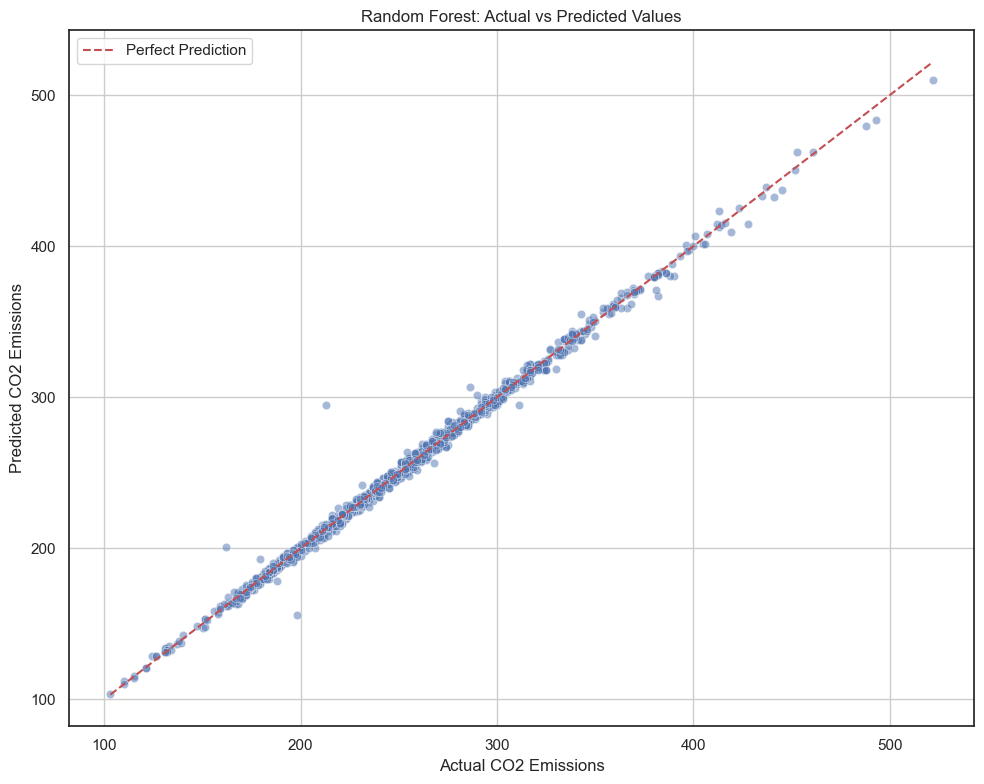

In [94]:
# Scatter plot of actual vs predicted values

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Random Forest: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


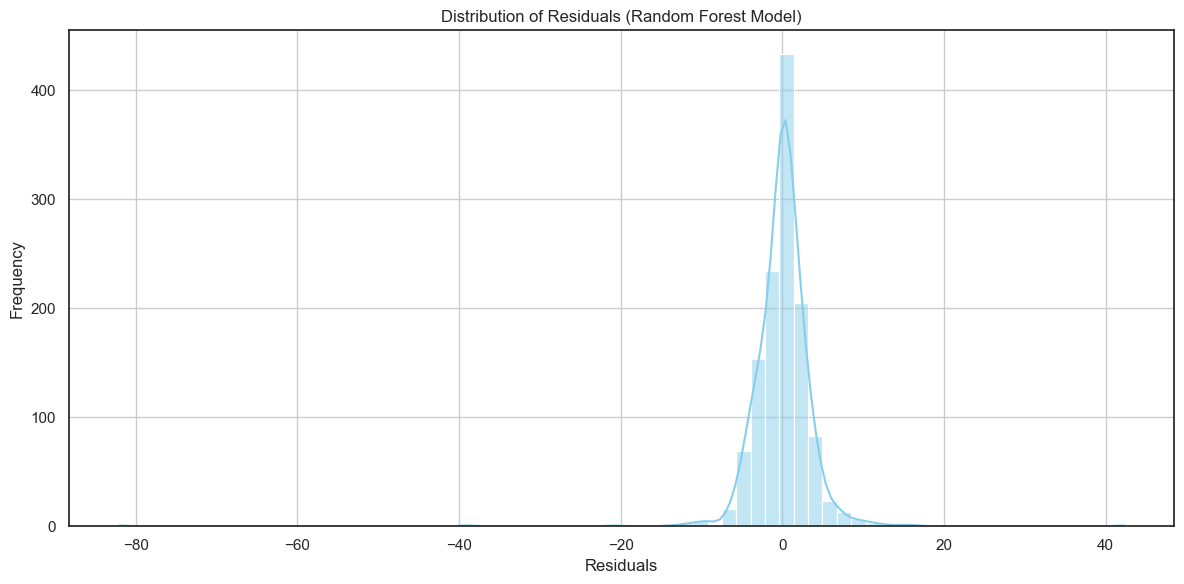

In [95]:
# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Plot the distribution of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals_rf, kde=True, bins=70, color="skyblue")
plt.title("Distribution of Residuals (Random Forest Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


## Gradient Boosting Regression

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Gradient Boosting model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions
y_train_pred_gbr = gbr_model.predict(X_train)
y_test_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model on training data
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
train_mae_gbr = mean_absolute_error(y_train, y_train_pred_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)

# Evaluate the model on test data
test_mse_gbr = mean_squared_error(y_test, y_test_pred_gbr)
test_mae_gbr = mean_absolute_error(y_test, y_test_pred_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)

# Print performance results
print("Train Performance (Gradient Boosting):")
print("R² Score:", train_r2_gbr)
print("MSE:", train_mse_gbr)
print("MAE:", train_mae_gbr)

print("\nTest Performance (Gradient Boosting):")
print("R² Score:", test_r2_gbr)
print("MSE:", test_mse_gbr)
print("MAE:", test_mae_gbr)


Train Performance (Gradient Boosting):
R² Score: 0.9974237560736987
MSE: 8.992847357170453
MAE: 2.3067733035924745

Test Performance (Gradient Boosting):
R² Score: 0.9951276539909447
MSE: 17.582940947435148
MAE: 2.631128268167983


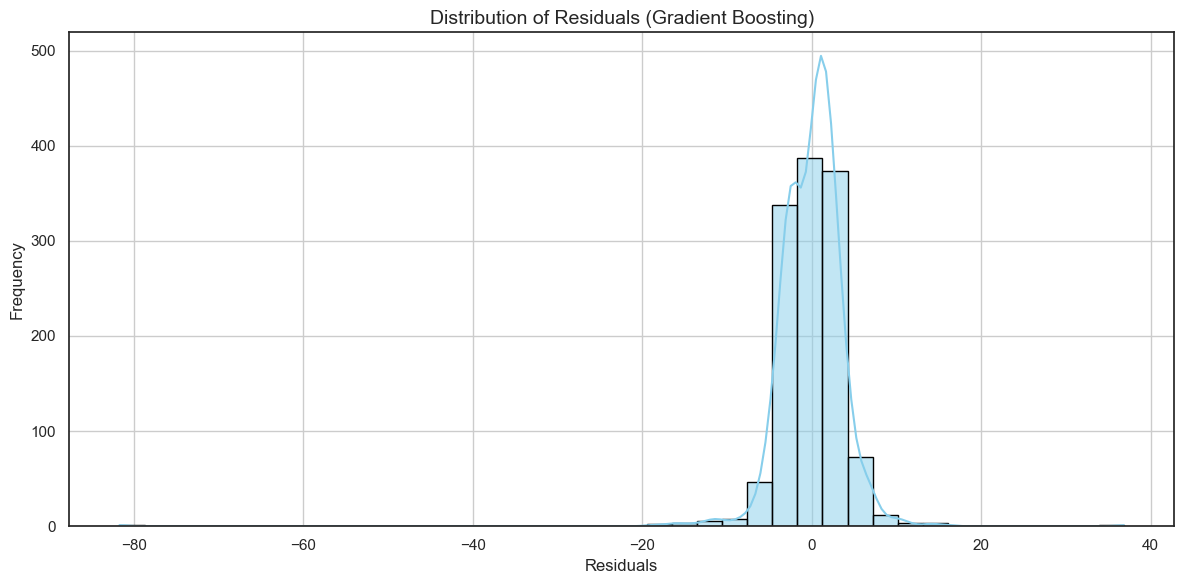

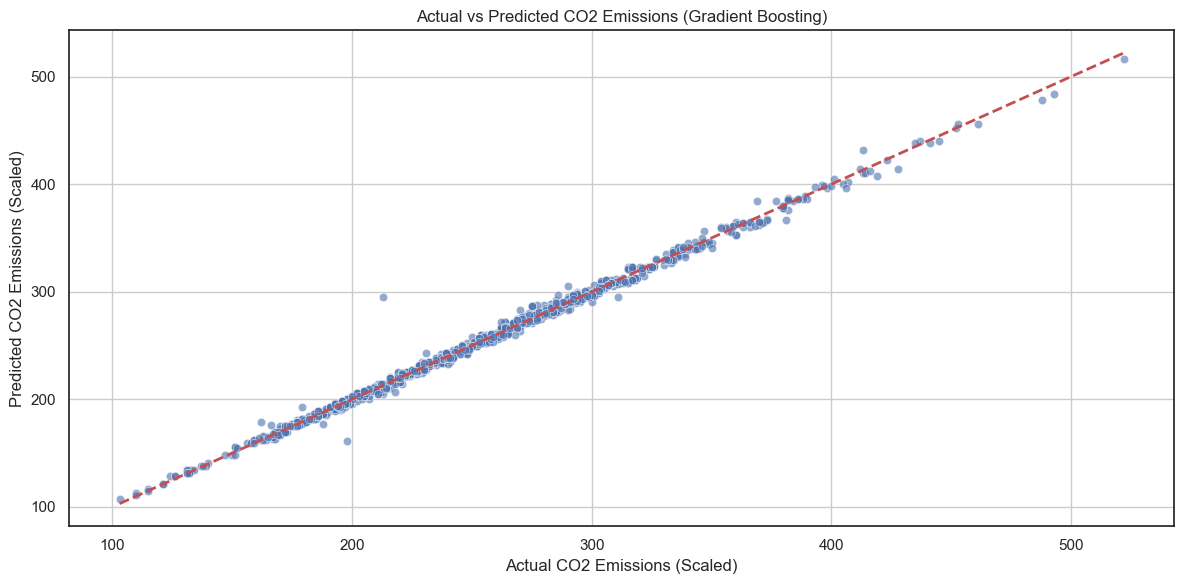

In [98]:
# Re-import libraries due to kernel reset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Residuals
residuals = y_test - y_test_pred_gbr

# Plot Residuals Distribution
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=40, color="skyblue", edgecolor="black")
plt.title("Distribution of Residuals (Gradient Boosting)", fontsize=14)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Predicted vs Actual
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_test_pred_gbr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.xlabel("Actual CO2 Emissions (Scaled)")
plt.ylabel("Predicted CO2 Emissions (Scaled)")
plt.title("Actual vs Predicted CO2 Emissions (Gradient Boosting)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd

# Dictionary to store model names and their corresponding [train_predictions, test_predictions]
model_predictions = {
    "Linear Regression": [y_train_pred, y_test_pred],
    "Random Forest": [y_train_pred_rf, y_test_pred_rf],
    "Gradient Boosting": [y_train_pred_gbr, y_test_pred_gbr]
}

# Initialize an empty dictionary to collect evaluation metrics
results = {}

# Loop through each model and calculate performance metrics
for model_name, (y_tr_pred, y_te_pred) in model_predictions.items():
    results[model_name] = {
        "Train R²": r2_score(y_train, y_tr_pred),                       # R² score for training data
        "Test R²": r2_score(y_test, y_te_pred),                         # R² score for testing data
        "Train MAE": mean_absolute_error(y_train, y_tr_pred),          # Mean Absolute Error on training data
        "Test MAE": mean_absolute_error(y_test, y_te_pred),            # Mean Absolute Error on test data
        "Train MSE": mean_squared_error(y_train, y_tr_pred),           # Mean Squared Error on training data
        "Test MSE": mean_squared_error(y_test, y_te_pred),             # Mean Squared Error on test data
    }

# Convert the results dictionary to a DataFrame for better visualization
comparison_df = pd.DataFrame(results).T

# Display the comparison table
comparison_df



,Train R²,Test R²,Train MAE,Test MAE,Train MSE,Test MSE
Linear Regression,0.993430,0.991328,2.994130,3.233759,22.933032,31.294304
Random Forest,0.999253,0.995335,1.079368,2.220655,2.609002,16.833873
Gradient Boosting,0.997424,0.995128,2.306773,2.631128,8.992847,17.582941


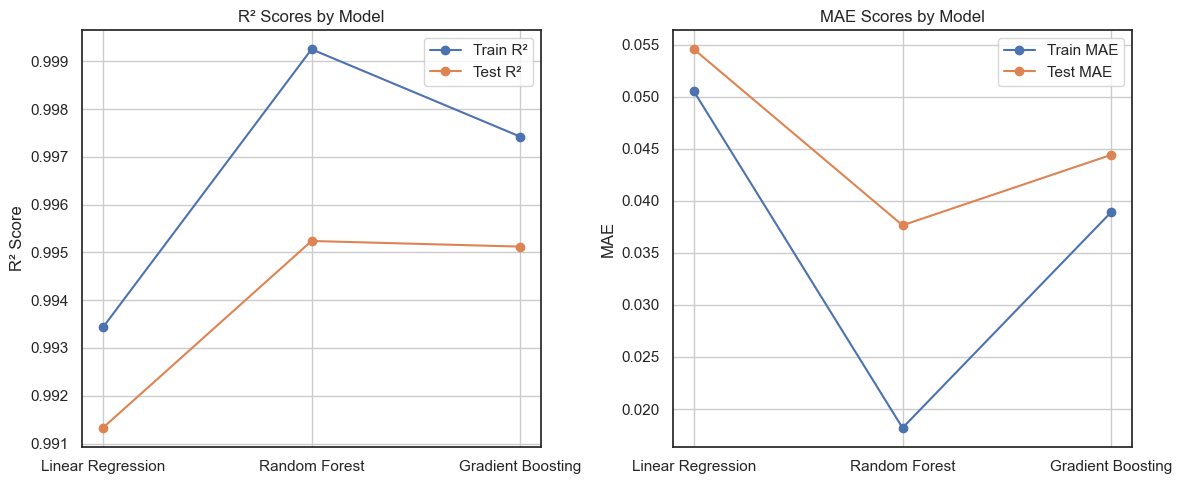

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Performance metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
train_r2 = [0.993430, 0.999253, 0.997424]
test_r2 = [0.991328, 0.995240, 0.995122]
train_mae = [0.050503, 0.018189, 0.038909]
test_mae = [0.054545, 0.037642, 0.044407]
train_mse = [0.006525, 0.000742, 0.002559]
test_mse = [0.008904, 0.004888, 0.005008]

# Create a dataframe for plotting
df_metrics = pd.DataFrame({
    'Model': models,
    'Train R²': train_r2,
    'Test R²': test_r2,
    'Train MAE': train_mae,
    'Test MAE': test_mae,
    'Train MSE': train_mse,
    'Test MSE': test_mse
})

# Plot R² Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(models, train_r2, marker='o', label='Train R²')
plt.plot(models, test_r2, marker='o', label='Test R²')
plt.title('R² Scores by Model')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)

# Plot MAE Scores
plt.subplot(1, 2, 2)
plt.plot(models, train_mae, marker='o', label='Train MAE')
plt.plot(models, test_mae, marker='o', label='Test MAE')
plt.title('MAE Scores by Model')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**The Random Forest model is the most successful one due to its high accuracy, low error rates, and balanced generalization ability. It performs especially well on complex and high-dimensional datasets.**

## Hyperparameter Tuning

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50,100, 200, 300],                  # Number of trees in the forest
    'max_depth': [10, 20, 30],                        # Maximum depth of each tree
    'min_samples_split': [2, 5,10],                      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2,4],                       # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt']                  # Number of features to consider when looking for the best split
}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                           # 5-fold cross-validation
    n_jobs=-1,                      # Use all available cores
    verbose=2,
    scoring='r2'                    # Evaluation metric (R-squared)
)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best R² score from GridSearchCV: ", grid_search.best_score_)

# Use the best model for predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print("Evaluation of the Best Random Forest Model:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² score from GridSearchCV:  0.9934065821576263
Evaluation of the Best Random Forest Model:
R² Score: 0.9932
Mean Squared Error (MSE): 24.5414
Mean Absolute Error (MAE): 2.7310


## Pipeline

In [105]:
df_encoding

,vehicle_type,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_per_100_km,Fuel_Consumption_Hwy_L_per_100_km,Fuel_Consumption_Comb_L_per_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_per_km,...,model_grouped_camaro,model_grouped_corolla,model_grouped_f_150_ffv,model_grouped_f_150_ffv_4x4,model_grouped_focus_ffv,model_grouped_mustang,model_grouped_sierra,model_grouped_sierra_4wd,model_grouped_silverado,model_grouped_silverado_4wd
0,compact_car,2.0,4,AS5,petrol,9.9,6.7,8.5,33,196,...,0,0,0,0,0,0,0,0,0,0
1,compact_car,2.4,4,M6,petrol,11.2,7.7,9.6,29,221,...,0,0,0,0,0,0,0,0,0,0
2,compact_car,1.5,4,AV7,petrol,6.0,5.8,5.9,48,136,...,0,0,0,0,0,0,0,0,0,0
3,small_suv,3.5,6,AS6,petrol,12.7,9.1,11.1,25,255,...,0,0,0,0,0,0,0,0,0,0
4,small_suv,3.5,6,AS6,petrol,12.1,8.7,10.6,27,244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,small_suv,2.0,4,AS8,petrol,10.7,7.7,9.4,30,219,...,0,0,0,0,0,0,0,0,0,0
7381,small_suv,2.0,4,AS8,petrol,11.2,8.3,9.9,29,232,...,0,0,0,0,0,0,0,0,0,0
7382,small_suv,2.0,4,AS8,petrol,11.7,8.6,10.3,27,240,...,0,0,0,0,0,0,0,0,0,0
7383,standard_suv,2.0,4,AS8,petrol,11.2,8.3,9.9,29,232,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   vehicle_type                        6282 non-null   object 
 1   Engine_Size_L                       6282 non-null   float64
 2   Cylinders                           6282 non-null   int64  
 3   Transmission                        6282 non-null   object 
 4   Fuel_Type                           6282 non-null   object 
 5   Fuel_Consumption_City_L_per_100_km  6282 non-null   float64
 6   Fuel_Consumption_Hwy_L_per_100_km   6282 non-null   float64
 7   Fuel_Consumption_Comb_L_per_100_km  6282 non-null   float64
 8   Fuel_Consumption_Comb_mpg           6282 non-null   int64  
 9   CO2_Emissions_g_per_km              6282 non-null   int64  
 10  brand_grouped_Bmw                   6282 non-null   int32  
 11  brand_grouped_Chevrolet             6282 non-nul

In [107]:
df_encoding.shape

(6282, 30)

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Automatically detect features
numeric_features = df_encoding.select_dtypes(include=['int64', 'float64']).drop(columns='CO2_Emissions_g_per_km').columns.tolist()
categorical_features = df_encoding.select_dtypes(include=['object']).columns.tolist()

# Preprocessing steps: scaling numeric features and encoding categoricals
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Define the base pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameter grid for RandomForest
param_grid = {
    'regressor__n_estimators': [50,100, 200, 300],
    'regressor__max_depth': [10, 20,30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt']
}

# Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

# Split the dataset
X = df_encoding.drop(columns='CO2_Emissions_g_per_km')
y = df_encoding['CO2_Emissions_g_per_km']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Predict with best model
y_pred = grid_search.predict(X_test)

# Evaluate
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
R² Score: 0.9950494519800271
MSE: 17.86515024401988
MAE: 2.279274160312119


### Feature Importance

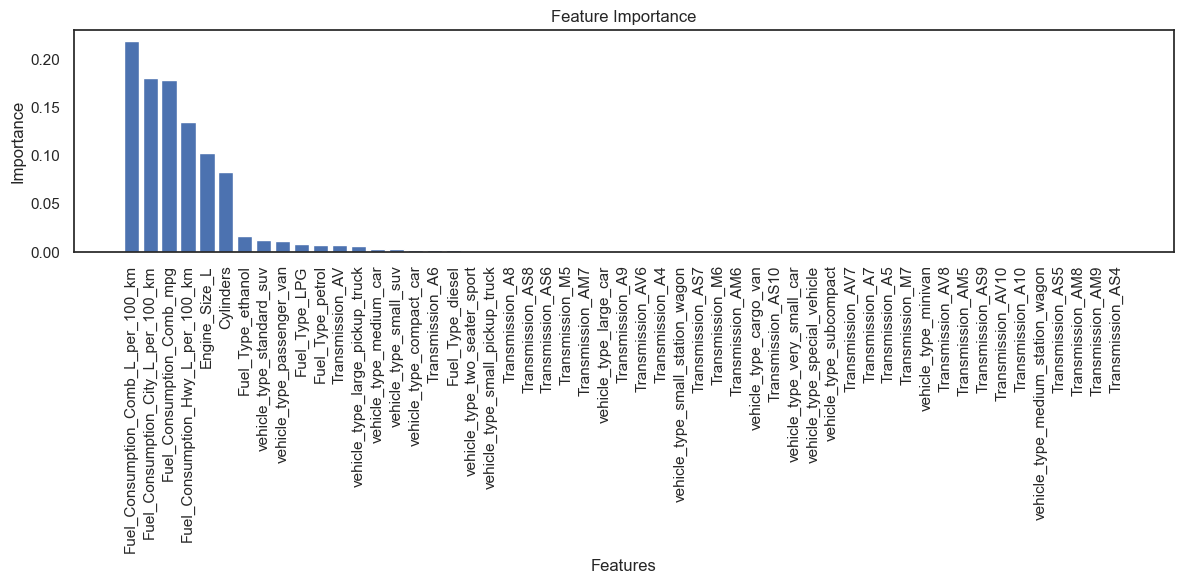

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names after preprocessing
# 1. Numeric columns (as they are)
numeric_feature_names = numeric_features

# 2. Categorical columns (expanded by OneHotEncoder)
# OneHotEncoder gets feature names from the pipeline
categorical_feature_names = grid_search.best_estimator_['preprocessor']\
    .named_transformers_['cat']\
    .get_feature_names_out(categorical_features)

# 3. Combine all feature names
all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Get feature importances from best model (Random Forest)
importances = grid_search.best_estimator_['regressor'].feature_importances_

# Create sorted indices
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), all_feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


### Saving the model using ``pickle``

In [201]:
# Import the pickle library for saving the model
import pickle

# Define the filename to save the trained pipeline model
filename = 'carbon_emission_predictor.sav'

# Save the best pipeline (including preprocessing and model)
# This saves the full pipeline object: preprocessor + model
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))


In [203]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
            
        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

matplotlib==3.9.2
numpy==1.26.4
pandas==2.2.2
scikit-learn==1.5.1
seaborn==0.13.2
